In [ ]:
from tensorflow.keras.applications.xception import Xception
from keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_input = Input(shape=(224, 224, 3))
train_set='/content/drive/MyDrive/Melanoma Dataset/data/train'
test_set='/content/drive/MyDrive/Melanoma Dataset/data/test'
model = Xception(input_tensor=image_input, weights='imagenet', include_top=False)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
  model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
last_layer = model.get_layer('block14_sepconv2_bn').output
out = Dense(1, activation='sigmoid', name='output')(last_layer)
custom_model = Model(image_input, out)
custom_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Melanoma Dataset/data/train',
                                             target_size=(64,64),
                                             batch_size=16,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Melanoma Dataset/data/test',
                                           target_size=(64,64),
                                           batch_size = 16,
                                           class_mode='binary',
                                           shuffle=True)

Found 2224 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
classifier=Sequential()
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history = classifier.fit(train_set,
                        steps_per_epoch=(2224/16),
                        epochs = 30,
                        validation_data = test_set,
                        validation_steps =(400/16),
                        #callbacks=[tensorboard]
                        );

Epoch 1/30
139/139 [==============================] - 377s 3s/step - loss: 1.3516 - accuracy: 0.6124 - val_loss: 0.6140 - val_accuracy: 0.7325
Epoch 2/30
139/139 [==============================] - 14s 103ms/step - loss: 0.7055 - accuracy: 0.6987 - val_loss: 0.4762 - val_accuracy: 0.7675
Epoch 3/30
139/139 [==============================] - 14s 104ms/step - loss: 0.6416 - accuracy: 0.7122 - val_loss: 0.7693 - val_accuracy: 0.6850
Epoch 4/30
139/139 [==============================] - 15s 105ms/step - loss: 0.6738 - accuracy: 0.7068 - val_loss: 0.4997 - val_accuracy: 0.7875
Epoch 5/30
139/139 [==============================] - 14s 104ms/step - loss: 0.6163 - accuracy: 0.7275 - val_loss: 0.4684 - val_accuracy: 0.8000
Epoch 6/30
139/139 [==============================] - 14s 102ms/step - loss: 0.6561 - accuracy: 0.7154 - val_loss: 0.7048 - val_accuracy: 0.6775
Epoch 7/30
139/139 [==============================] - 14s 103ms/step - loss: 0.6119 - accuracy: 0.7235 - val_loss: 0.4657 - val_accu

In [ ]:
model.save('/content/drive/MyDrive/saved_models/model2.hdf5')

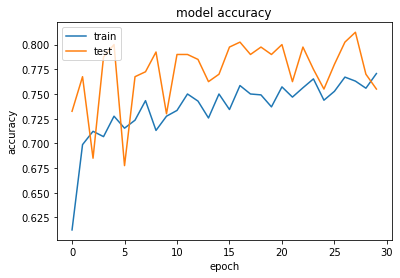

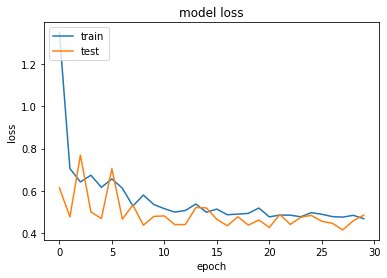

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

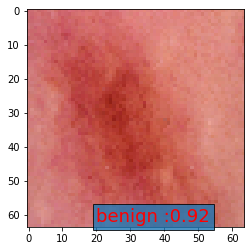

In [ ]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img(r'/content/drive/MyDrive/Melanoma Dataset/data/test/benign/136.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='malignant :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(alpha=0.8))
else:
    value ='benign :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(alpha=0.8))

plt.imshow(img1)
plt.show()

In [ ]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,benign/1.jpg,0.24836,0,0
1,benign/10.jpg,0.91405,0,1
2,benign/11.jpg,0.07759,0,0
3,benign/12.jpg,0.67516,0,1
4,benign/13.jpg,0.89150,0,1
5,benign/136.jpg,0.06473,0,0
6,benign/137.jpg,0.59360,0,1
7,benign/138.jpg,0.44494,0,0
8,benign/139.jpg,0.16545,0,0
9,benign/14.jpg,0.80657,0,1


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 496 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 496 Validation images : 220


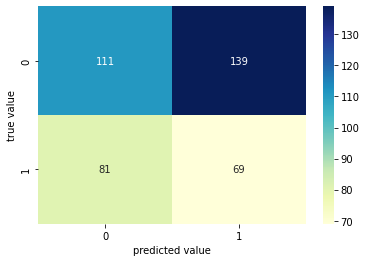

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

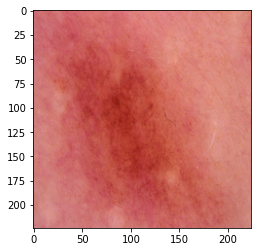

In [ ]:
img1 = image.load_img(r'/content/drive/MyDrive/Melanoma Dataset/data/test/benign/136.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img(r'/content/drive/MyDrive/Melanoma Dataset/data/test/benign/136.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
x1 = classifier.evaluate(train_set)
x2 = classifier.evaluate(test_set)

25/25 [==============================] - 2s 64ms/step - loss: 0.4844 - accuracy: 0.7550


In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 78.46%     Training loss  : 0.463826
Validation Accuracy: 75.50%     Validation loss: 0.484441


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
confusion_df = pd.DataFrame(confusion_matrix(df.y,df.y_pred),
                           columns=["Predicted Class" + str(class_name) for class_name in [0,1]],
                           index = ["Class" + str(class_name) for class_name in [0,1]])

print(confusion_df)

        Predicted Class0  Predicted Class1
Class0               111               139
Class1                81                69


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df.y,df.y_pred))

              precision    recall  f1-score   support

           0       0.58      0.44      0.50       250
           1       0.33      0.46      0.39       150

    accuracy                           0.45       400
   macro avg       0.45      0.45      0.44       400
weighted avg       0.49      0.45      0.46       400

